# Forest Cover Dataset Analysis
[UC Irvine machine Learning Repository - Covertype](https://archive.ics.uci.edu/ml/datasets/covertype)  
After downloading `covtype.data`, I renamed it to `forest_cover.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Models
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
columns = [
    # Quantitative Features
    "elevation", # Elevation in meters
    "azimuth", # Aspect in degrees azimuth
    "slope", # Slope in degrees
    "horz_water", # Horizontal distance to nearest surface water features in meters
    "vert_water", # Vertical distance to nearest surface water features in meters
    "horz_roads", # Horizontal distance to nearest roadway in meters
    "hillshade_9am", # Hillshade index at 9am on the Summer Solstice 0-255 index
    "hillshade_noon", # Hillshade index at noon on the Summer Solstice 0-255 index
    "hillshade_3pm", # Hillshade index at 3pm on the Summer Solstice 0-255 index
    "horz_fire", # Horizontal distance to nearest wildfire ignition points in meters

    # Qualitative Features
    # Wilderness area designation given as 4 binary columns
    "wa1","wa2","wa3","wa4",
    # Soil Type given as 40 binary columns
    'st1', 'st2', 'st3', 'st4', 'st5', 'st6', 'st7', 'st8', 'st9', 'st10',
    'st11', 'st12', 'st13', 'st14', 'st15','st16', 'st17', 'st18', 'st19', 'st20',
    'st21', 'st22', 'st23', 'st24', 'st25', 'st26', 'st27', 'st28', 'st29','st30',
    'st31', 'st32', 'st33', 'st34', 'st35', 'st36', 'st37', 'st38', 'st39', 'st40',

    # Classes
    "cover_type", # Integer 1-7 Cover Type Designation
]

target_names = {
    1:"Spruce/Fir",
    2:"Lodgepole Pine",
    3:"Ponderosa Pine",
    4:"Cottonwood/Willow",
    5:"Aspen",
    6:"Douglas-fir",
    7:"Krummholz"
}

df = pd.read_csv("./forest_cover.csv", names=columns)
df.head()

,elevation,azimuth,slope,horz_water,vert_water,horz_roads,hillshade_9am,hillshade_noon,hillshade_3pm,horz_fire,...,st32,st33,st34,st35,st36,st37,st38,st39,st40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
feature_cols = columns[:-1]

X = df.loc[:, feature_cols]
y = df.cover_type

In [4]:
scoring = [
        'roc_auc_ovr',
        'f1_weighted',
    ]

In [5]:
lda_clf = Pipeline(steps=[
    ('preprocesser', StandardScaler()),
    ('clf', LinearDiscriminantAnalysis()),
])
lda_cross = cross_validate(lda_clf, X, y, cv=10, scoring=scoring)

In [6]:
gnb_clf = Pipeline(steps=[
        ('preprocesser', StandardScaler()),
        ('clf', GaussianNB()),
])
gnb_cross = cross_validate(gnb_clf, X, y, cv=10, scoring=scoring)

In [7]:
forest_clf = Pipeline(steps=[
    ('clf', RandomForestClassifier(n_estimators=10, criterion='entropy')),
])
forest_cross = cross_validate(forest_clf, X, y, cv=10, scoring=scoring)

In [8]:
sel = 'test_roc_auc_ovr'
roc_auc_ovr = {
    'lda': lda_cross[sel],
    'gnb': gnb_cross[sel],
    'forest': forest_cross[sel],
}

In [9]:
data = pd.DataFrame(roc_auc_ovr)
data

,lda,gnb,forest
0,0.912423,0.847601,0.914582
1,0.881522,0.796517,0.880815
2,0.948371,0.836814,0.919455
3,0.886347,0.828912,0.902063
4,0.858979,0.820659,0.869098
5,0.869687,0.766117,0.903875
6,0.888441,0.736424,0.899188
7,0.857543,0.722606,0.881049
8,0.863279,0.761065,0.875153
9,0.862813,0.792546,0.927315


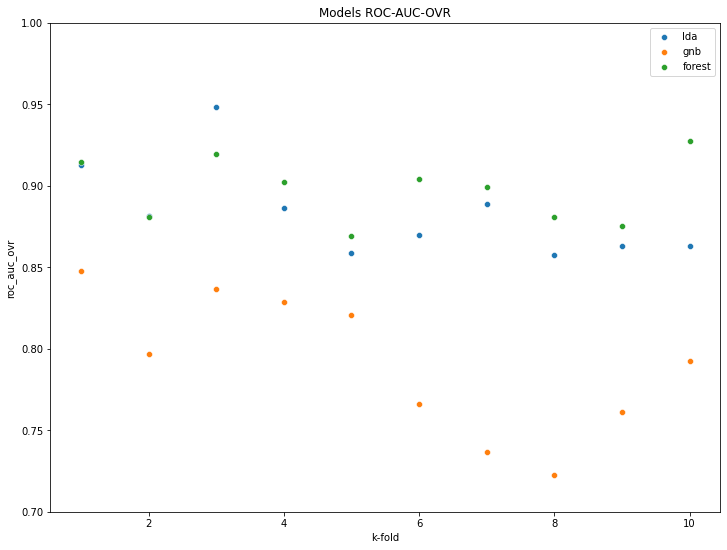

In [10]:
# ROC-AUC
x = range(1, 11)
plt.figure(figsize=[12,9])
plt.ylim(.7,1)
p = sns.scatterplot(
    x=x,
    y=data['lda'],
    )
sns.scatterplot(x=x, y=data['gnb'])
sns.scatterplot(x=x, y=data['forest'])

plt.legend(data.columns)

p.set(title="Models ROC-AUC-OVR", xlabel="k-fold", ylabel="roc_auc_ovr")
plt.show()

In [11]:
sel = 'test_f1_weighted'
f1_weighted = {
    'lda': lda_cross[sel],
    'gnb': gnb_cross[sel],
    'forest': forest_cross[sel],
}

In [12]:
data = pd.DataFrame(f1_weighted)
data

,lda,gnb,forest
0,0.574264,0.226847,0.690749
1,0.591118,0.281391,0.574226
2,0.820984,0.037991,0.701669
3,0.645912,0.026143,0.627943
4,0.444025,0.009591,0.482580
5,0.722518,0.032835,0.621263
6,0.659340,0.033642,0.623481
7,0.675967,0.040659,0.565011
8,0.555549,0.077656,0.555785
9,0.547325,0.061711,0.630633


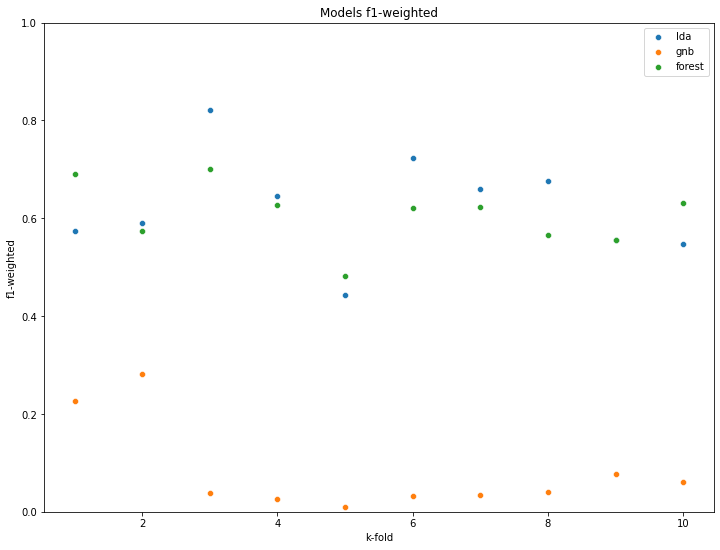

In [13]:
# F1-Weighted
x = range(1, 11)
plt.figure(figsize=[12,9])
plt.ylim(0,1)
p = sns.scatterplot(
    x=x,
    y=data['lda'],
    )
sns.scatterplot(x=x, y=data['gnb'])
sns.scatterplot(x=x, y=data['forest'])

plt.legend(data.columns)

p.set(title="Models f1-weighted", xlabel="k-fold", ylabel="f1-weighted")
plt.show()